In [1]:
def load_text(text_path="./data/dataset/train.txt"):
    with open(text_path, "r") as f:
        corpus = f.read().strip("\n")
    return corpus

train_text = load_text("./data/dataset/train.txt")

In [2]:
def load_class_list(text_path="./data/dataset/class.txt"):
    with open(text_path, "r") as f:
        class_text = f.read().strip("\n")
    class_list = []
    for line in class_text.split("\n"):
        class_name = line.split("\t")[0]
        class_list.append(class_name)
    return class_list

class_list = load_class_list()

In [6]:
label_list = []
for i, line in enumerate(train_text.split("\n")):
    label = eval(line.split("\t")[1])
    label_list.append(label)

label_list[:10]

[59, 51, 32, 70, 100, 23, 5, 32, 95, 84]

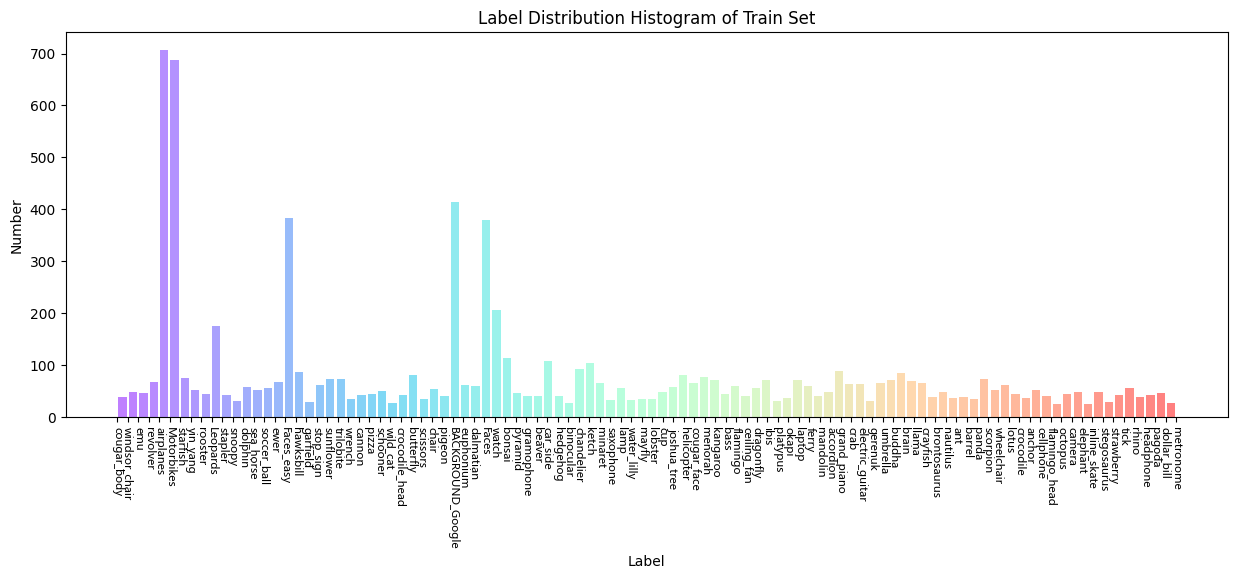

In [19]:
# 不同类别使用不同颜色
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
colors = cm.rainbow(np.linspace(0, 1, len(class_list)))

font = FontProperties(fname="./others/fonts/msyh.ttf", size=8)

# 画出各个类别的数量分布
def plot_label(labels):
    """绘制类别分布图"""
    values, bins, patches = plt.hist(labels, bins = len(class_list), alpha=0.5, rwidth=0.8)
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
        # patch.set_label(class_list[int(patch.get_x())])
    # plt.legend(prop=font, loc='upper right', bbox_to_anchor=(1.50, 1.5))
    plt.xticks(range(len(class_list)), class_list, rotation=-90, fontproperties=font)
    plt.title('Label Distribution Histogram of Train Set')
    plt.xlabel('Label')
    plt.ylabel('Number')
    plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

plt.figure(figsize=(15, 5))
plot_label(label_list)